In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as st
import numpy.linalg as ng
%matplotlib inline


[]

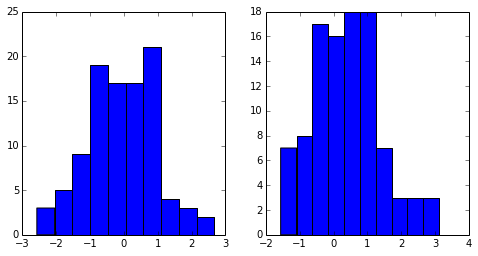

In [3]:
### generate samples

n = 100
x1 = np.random.normal(0,1,n)
x2 = np.random.normal(0,1,n)+0.3

#### plot samples

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(x1)
plt.subplot(1,2,2)
plt.hist(x2)
plt.plot()

[]

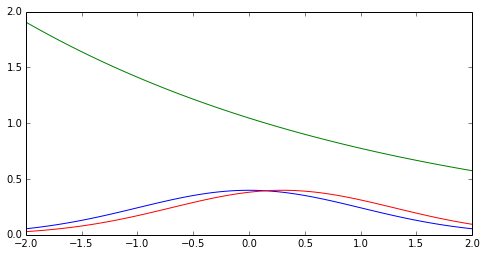

In [4]:
#### plot density
beta = 1.0
xxx = np.linspace(-2,2,n)

y1 = [st.norm.pdf(i,0,1) for i in xxx]
y2 = [st.norm.pdf(i,0.3,1) for i in xxx]
true_ratio  = [ y1[i]/(beta*y2[i]+(1-beta)*y1[i]) for i in range(n)]

plt.figure(figsize=(8,4))
plt.plot(xxx,y1)
plt.plot(xxx,y2,c="red")
plt.plot(xxx,true_ratio,c="green")
plt.plot()

### KL divergence method for density estimation

In [11]:
learning_rate = 1.0
h = 0.2
def gauss_kernel(x,y):
    return np.exp(-0.5*np.power((x-y)/h,2))

def gauss_kernel_list(x):
    return np.array([ gauss_kernel(x,i) for i in x1])

def pred(x):
    gauss = gauss_kernel_list(x)
    return np.dot(theta,gauss)

theta = np.array([1.0/20 for i in range(n)])

for i in range(50):
    ##theta = theta/np.mean(map(pred,x2))
    first_term = [gauss_kernel_list(i) for i in x2]
    first_term = np.mean(first_term,0)/(n*1.0)
    second_term = (1.0/theta.sum())*np.array([1/(n*1.0) for i in range(n)])
    diff_theta = first_term - second_term
    theta = theta - learning_rate*diff_theta
    print "a " +str(np.mean(map(pred,x2))-np.mean(map(np.log,map(pred,x1))))+" b "+str(np.mean(map(pred,x2)))
xxxx = np.linspace(-2,2,n)
yyyy = map(pred,xxx)

a 1.12615073492 b 0.679474395272
a 1.11927496084 b 0.684483033129
a 1.11278444355 b 0.689166706498
a 1.10664435262 b 0.693545322471
a 1.10082431932 b 0.697636958966
a 1.09529774549 b 0.701458090679
a 1.09004123953 b 0.705023780365
a 1.0850341526 b 0.708347841718
a 1.08025819459 b 0.711442978873
a 1.07569711423 b 0.714320906478
a 1.07133643089 b 0.716992453572
a 1.06716320857 b 0.719467653841
a 1.06316586442 b 0.721755824391
a 1.05933400585 b 0.723865634764
a 1.05565829109 b 0.725805167644
a 1.05213030969 b 0.727581972431
a 1.04874247934 b 0.729203112701
a 1.04548795671 b 0.730675208365
a 1.04236056009 b 0.732004473245
a 1.03935470192 b 0.733196748655
a 1.03646533002 b 0.734257533502
a 1.03368787601 b 0.735192011327
a 1.03101821013 b 0.73600507467
a 1.02845260142 b 0.73670134706
a 1.02598768271 b 0.737285202929
a 1.0236204196 b 0.73776078566
a 1.02134808316 b 0.738132023998
a 1.01916822565 b 0.738402646991
a 1.01707865908 b 0.738576197622
a 1.01507743619 b 0.73865604527
a 1.01316283355 

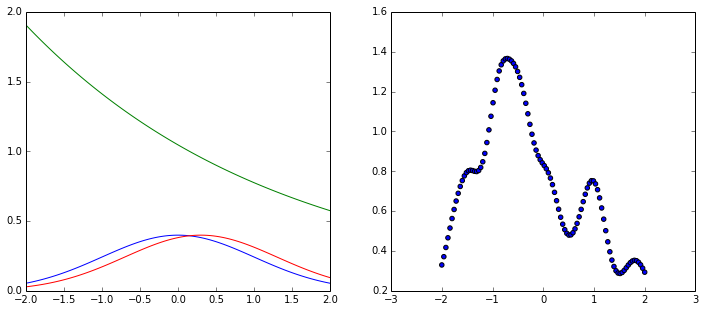

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(xxx,y1)
plt.plot(xxx,y2,c="red")
plt.plot(xxx,true_ratio,c="green")
plt.subplot(1,2,2)
plt.scatter(xxxx,yyyy)
plt.savefig("./covariant/density_kl.png")
plt.show()

## minimum square method for density estimation

(1000,)


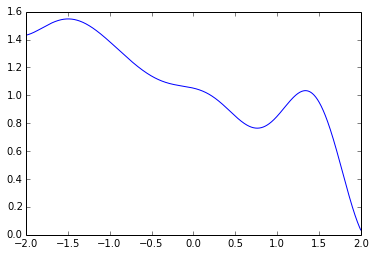

In [132]:



conc = np.concatenate([x1,x2])
my_list=[2.0]

for j in my_list:
    G = []
    for i in conc:
        ccc =np.array([[np.exp(-np.power(i-k,2)/j) for k in x2[0:200]]])
        G.append(np.dot(np.transpose(ccc),ccc))
    G = np.mean(G,0)
    h = np.mean(np.array([[np.exp(-np.power(i-k,2)/j) for k in x2[0:200]] for i in x1]),0)
    alpha =ng.solve(G+0.2,h)
    pred_ratio = [ np.dot(alpha,[np.exp(-np.power(i-k,2)/j) for k in x2[0:200]]) for i in xxx ]
    print np.array(pred_ratio).shape
    plt.plot(xxx,np.array(pred_ratio))
    plt.plot()